In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bz2

### Ejercicio 1
#### Count the number of lines in Python for each file

In [3]:
!ls -l

total 1015712
-rw-rw-rw- 1 angelrps angelrps    523313 Jan  8 16:31  01_intro_to_DS_toolkit_inclass.ipynb
-rw-rw-rw- 1 angelrps angelrps     50785 Jan  8 12:52  02-loading_and_saving_data_inclass.ipynb
-rwxrwxrwx 1 angelrps angelrps    173167 Jan  8 10:13  10-11_Python_AmadChall_v19.pptx
-rw-rw-rw- 1 angelrps angelrps    189652 Jan 11 13:59  Amadeus_Challenge_Class.ipynb
-rw-rw-rw- 1 angelrps angelrps     94504 Jan 11 09:33  Amadeus_Challenge_Test.ipynb
-rw-rw-rw- 1 angelrps angelrps 554970628 Jan  9 09:44  bookings.csv.bz2
-rw-rw-rw- 1 angelrps angelrps    535893 Jan 11 09:21  bookings.sample.csv.bz2
-rw-rw-rw- 1 angelrps angelrps     14965 Jan 14 09:21  ch_01-Empty.ipynb
-rw-rw-rw- 1 angelrps angelrps    201405 Jan 14 09:21  ch_02-Empty.ipynb
-rw-rw-rw- 1 angelrps angelrps     40244 Jan 14 09:21  ch_05-empty.ipynb
-rw-rw-rw- 1 angelrps angelrps 483188920 Jan  9 09:44  searches.csv.bz2
-rw-rw-rw- 1 angelrps angelrps     77878 Jan 11 13:33  top_airports.csv
-rwxrwxrwx 1 angelrps angelr

In [6]:
%time
!bzcat bookings.csv.bz2 | wc -l
#result was 100000 11
#time processing 1' 28''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
10000011


In [7]:
%time
!bzcat searches.csv.bz2 | wc -l
#result was 20390198
#time processing 1' 30''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 23.8 µs
20390198


In [8]:
%time
bookingsfile = bz2.open("./bookings.csv.bz2")
dfbookings = pd.read_csv(bookingsfile, sep='^')
len(dfbookings.index)
#time processing 2' 58''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.5 µs


/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10000010

In [9]:
%time
searchesfile = bz2.open("./searches.csv.bz2")
dfsearches = pd.read_csv(searchesfile, sep='^')
len(dfsearches.index)
#time processing 6' 54''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20390198

### Ejercicio 2
#### Top 10 arrival airports in the world in 2013 (using the bookings file)

- Arrival airport is the column arr_port. It is the IATA code for the airport.
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.

- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)
- Bonus point: Solve this problem using pandas (instead of any other approach)

In [10]:
#Get 2 columns of interest
dfbookreduced = dfbookings[['arr_port','pax']]
#Group data by arr_port
grouped_bookings = dfbookreduced.groupby('arr_port')
#Sum pax, sort and show the first ten
grouped_bookings.sum().sort_values(by='pax', ascending=False).head(10)

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


### Ejercicio 3
#### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)


In [11]:
#Take the 2 columns of interest
dfs = dfsearches[['Date','Destination']]
#remove 'day' from Date so it can be sorted by month
dfs["Date"] = dfs['Date'].str[:-3]

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
#Retrieve Malaga values
#Retrieve Madrid values
#Retrieve Barcelona values
dfsAGP = dfs.loc[dfs['Destination'] == 'AGP']
dfsMAD = dfs.loc[dfs['Destination'] == 'MAD']
dfsBCN = dfs.loc[dfs['Destination'] == 'BCN']

# .value_counts() returns number of unique values for a particular column
dfsAGPcount = dfsAGP['Date'].value_counts()
dfsMADcount = dfsMAD['Date'].value_counts()
dfsBCNcount = dfsBCN['Date'].value_counts()

In [13]:
#Create cleaned and sorted Malaga data frame
MADdata = pd.DataFrame({'DateCount' : dfsMADcount, 'Destination' : 'MAD'})
MADdata.sort_index(inplace=True)
#Create cleaned and sorted Madrid data frame
AGPdata = pd.DataFrame({'DateCount' : dfsAGPcount, 'Destination' : 'AGP'})
AGPdata.sort_index(inplace=True)
#Create cleaned and sorted Barcelona data frame
BCNdata = pd.DataFrame({'DateCount' : dfsBCNcount, 'Destination' : 'BCN'})
BCNdata.sort_index(inplace=True)

#Create final data frame from other 3 data frames
FINALdata = pd.concat([AGPdata['DateCount'], MADdata['DateCount'], BCNdata['DateCount']], axis=1, keys=['AGP', 'MAD', 'BCN'])
FINALdata

,AGP,MAD,BCN
2013-01,9633,24258,29469
2013-02,8379,22800,28329
2013-03,10659,24681,30552
2013-04,8265,25251,31236
2013-05,10830,26334,28728
2013-06,7923,22800,26505
2013-07,8892,22971,29241
2013-08,7866,21831,27075
2013-09,8151,21147,23427
2013-10,6499,22294,20276


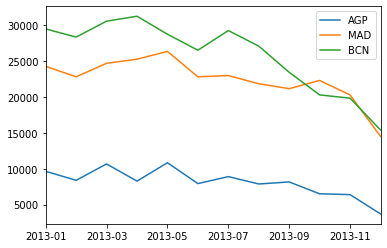

In [14]:
#Plot final data
FINALdata.plot()

### Ejercicio 4
#### Match searches with bookings

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

I assume that searches ending in booking where done the same day. Thus I will find searches which Data, Origin and Destination match with booking Date, Origin and Destination

In [96]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
dfbookings.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5517492,2013-08-08 00:00:00,1A,IN,c2eabd6154d31cb38d3b33f02f9f6c96,0c41e3b5ded9ae5b6e7350edf1d5204a,3cd43d97170cdc3895d74b0a56e574fb,2013-07-31 00:00:00,10021,0,DEL,DEL,IN,LHR,LON,GB,DEL,DEL,IN,ZRH,ZRH,CH,DEL,DEL,IN,DELZRH,DELZRH,CHIN,1,ZRHDEL,VI,P,F,2013-08-13 12:45:00,2013-08-14 00:16:41,-1.0,2013.0,8.0,NULL
7201068,2013-04-22 00:00:00,1A,DE,34049b7e0777d8ff69f9f50e67661f16,f0119dea9db5a8c0389757aeacece9b2,a962d4f4e019d3128fcfb93214a0481b,2013-04-09 00:00:00,11907,0,HAJ,HAJ,DE,CLT,CLT,US,HAJ,HAJ,DE,CLT,CLT,US,HAJ,HAJ,DE,CLTHAJ,CLTHAJ,DEUS,1,CLTFRAHAJ,FD,Z,C,2013-06-03 20:05:00,2013-06-04 14:37:46,-1.0,2013.0,4.0,NULL
5918745,2013-04-15 00:00:00,1P,US,1c48f062ed72d804fa50376f26ec7553,b50b5ca14080ec6f93396a18a33c3706,33f4e2400dc1a2bdec6edd305efd8c7e,2013-04-10 00:00:00,4919,0,SEA,SEA,US,ROC,ROC,US,SEA,SEA,US,ROC,ROC,US,SEA,SEA,US,ROCSEA,ROCSEA,USUS,0,ROCATLSEA,NV,S,Y,2013-05-20 12:12:00,2013-05-20 16:54:15,-1.0,2013.0,4.0,NULL
2977121,2013-05-21 00:00:00,1A,SA,79e7d7b4c24150259ed6aa02c50193bc,c010fe6f64236cabdd63d746b66c2827,de14468a2186ab2f71787393106cc761,2013-05-18 00:00:00,648,0,RUH,RUH,SA,JED,JED,SA,RUH,RUH,SA,JED,JED,SA,RUH,RUH,SA,JEDRUH,JEDRUH,SASA,0,JEDRUH,DG,I,C,2013-05-26 16:00:00,2013-05-26 17:48:05,-1.0,2013.0,5.0,NULL
7374996,2013-01-21 00:00:00,1A,NZ,7abe07c8d287295187c695c49a767929,12ce99a2f102d55feac85a359982df51,810d144b3c3f1f3aa6395b522fd4b2d6,2012-12-18 00:00:00,276439,0,AKL,AKL,NZ,FRA,FRA,DE,AKL,AKL,NZ,AKL,AKL,NZ,HKG,HKG,HK,AKLHKG,AKLHKG,HKNZ,1,AKLHKG,MI,I,C,2013-04-14 13:20:00,2013-04-14 20:54:50,-2.0,2013.0,1.0,NULL


In [25]:
dfsearches.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
8382316,2013-05-06,19:40:10,MTP,236cbf458f79dbb9d5e9c9430438c3db,US,BOS,SXM,1.0,2.0,BOS,SXM,2013-05-27,NaN,NaN,SXM,BOS,2013-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
4087300,2013-05-19,17:31:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,MOW,SIP,0.0,1.0,MOW,SIP,2013-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
6991673,2013-06-20,06:58:20,FXP,4831c67c44306edd3b762b101764babb,RU,AAQ,LED,0.0,2.0,AAQ,LED,2013-06-29,2C,C,LED,DME,2013-06-29,D2,J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MOW
13966918,2013-11-21,07:30:40,FCP,82943557f28d5c67a74dba06d063c79c,DK,CPH,CDG,0.0,1.0,CPH,CDG,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
12433029,2013-08-15,00:22:47,XSP,2e56b59f0e92016b3896e24942e8f2a3,IN,AMD,DAC,1.0,2.0,AMD,DAC,2014-01-21,NaN,NaN,DAC,AMD,2014-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0


In [30]:
#Column names have lots of white spaces. I remove them with str.strip()
dfbookings.columns = dfbookings.columns.str.strip()
dfbookings.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [ ]:
#bookings: cre_date, dep_port, arr_port
#searches: Date, Origin, Destination
#groupby date

In [83]:
#CREATE SMALLER SAMPLES TO WORK WITH
dfbookings4 = dfbookings[['cre_date', 'dep_port', 'arr_port']]
#cre_date has useless time info so I remove it
dfbookings4['cre_date'] = dfbookings4['cre_date'].str[:10]
dfbookingsSample = dfbookings4.sample(10000)
dfbookingsSample

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cre_date,dep_port,arr_port
9091129,2013-04-09,HAM,HER
2316420,2013-01-17,TGU,BCN
1072629,2013-03-25,MNL,KIX
7100962,2013-04-24,LYS,SXB
9444030,2013-09-12,AEP,COR
...,...,...,...
9755544,2013-09-06,CLE,ATL
1610167,2013-03-31,VKO,TAS
2243277,2013-01-03,TXL,DUB
5753232,2013-11-22,YYZ,YVR


In [85]:
#CREATE SMALLER SAMPLES TO WORK WITH
dfsearches4 = dfsearches[['Date', 'Origin', 'Destination']]
dfsearchesSample = dfsearches4.sample(10000)
dfsearchesSample

,Date,Origin,Destination
18830935,2013-06-12,CPH,DEL
8505596,2013-09-06,LHR,SFO
1812973,2013-01-18,FMO,VCE
18364606,2013-02-25,IST,ABZ
2640725,2013-05-08,BOD,ALG
...,...,...,...
16292544,2013-05-18,NCL,NBO
16090495,2013-10-22,CMH,ORD
7400002,2013-08-08,BDL,CLT
9913696,2013-08-09,IAD,DAR


In [97]:
#sort bookings
dfbookingsSample = dfbookingsSample.sort_values(by=['cre_date', 'dep_port', 'arr_port'])
dfbookingsSample

,cre_date,dep_port,arr_port
3015399,2011-10-28,LDB,BNE
308096,2011-11-21,ZRH,FLL
2920855,2011-12-23,BLQ,LIM
9125215,2012-01-10,BOM,OSL
6022120,2012-01-19,BLR,CNS
7619996,2012-02-27,RUH,MNL
6184382,2012-03-01,MAN,CHC
4482292,2012-04-07,SJO,IAH
8119996,2012-04-11,IAD,ICN
9030442,2012-04-12,DUB,AKL


In [ ]:
dfsearchesSample = dfsearches.